# CSC 673 Assignment 2:
##### Author: Md Asifur Rahman
#### Acknowledgements: 
1. All the datasets were provided by Dr. Natalia Khuri
2. Some of the code snippets were taken from the earlier solutions provided by Dr. Natalia Khuri

In [1]:
import pandas as pd
import os
from collections import Counter
from sklearn.model_selection import learning_curve
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
from file_processor import *
from IPython.display import Image
from workflow import *
import copy
import warnings
import os
warnings.filterwarnings('ignore')

# 1. Data Preprocessing 

### 1.1. Parsing textfile and saving them to "output/processed_data" using parse_files_in_directory() function from file_processor

In [2]:
file_dir = '../data/'
save_dir = '../output/processed_data'
parse_files_in_directory(file_dir,
                          save_dir,
                          lowercase_col=True,
                          lowercase_col_name='Name',
                          merge_data_col=True,
                          merge_data_to_col_pos=1
                         )

### 1.2 Reading the dataset csv files and getting pre-processing informations using get_preprocessing_info() function of class DataPreProcessing 

In [3]:
dp = DataPreProcessing()
dp.get_preprocessing_info(save_dir)

--------------------
Dataset: MATE1 
No of columns : 733 
No of data instances:  888 
No of data Instance with nan (missing) value:  23 
No of column with nan (missing) value:  561 
No of duplicate rows: 0
--------------------
Dataset: OAT1 
No of columns : 773 
No of data instances:  1971 
No of data Instance with nan (missing) value:  11 
No of column with nan (missing) value:  9 
No of duplicate rows: 0
--------------------
Dataset: OAT3 
No of columns : 773 
No of data instances:  1971 
No of data Instance with nan (missing) value:  11 
No of column with nan (missing) value:  9 
No of duplicate rows: 0
--------------------
Dataset: OATP1B1 
No of columns : 732 
No of data instances:  224 
No of data Instance with nan (missing) value:  0 
No of column with nan (missing) value:  0 
No of duplicate rows: 0
--------------------
Dataset: OATP1B3 
No of columns : 732 
No of data instances:  224 
No of data Instance with nan (missing) value:  0 
No of column with nan (missing) value:  0 


#### 1.2.1 Observation
- Out of the 8 datasets, 5 contain missing values. Since imputing missing value along the physicochemical features may also affect inhibition. Therefore, in this project, instead of imputing the missing values, instances with missing values will be removed. 
- There are no duplicated instances within the files.
- The files themselves have no duplicated contents between them.

### 1.3 Performing the following data preprocessing and cleanup by calling the pre_processing_cleaning() function from file_processor:
- Remove negative values from the "Inhibition" attribute.
- Convert the "Inhibition" column values to binary values using a threshold of 50.
- Adjust the datatype of the features.
- Remove data instances (row) with missing (nan) values. 
- Remove features that have near zero variance. 
- Select diverse features with a high correlation with the target column ("Inhibition").
- Remove outliers exceeding 5 standard deviations (SD). Such SD range has been chosen so that the number of data instances are not reduced significantly.

In [4]:
cleaned_dataset = copy.deepcopy(dp.datasets)
cleaned_dataset = pre_processing_cleaning(cleaned_dataset)

PRE-PROCESSING AND CLEANING
##############################
Processing dataset: MATE1
------------------------------
No of instance in the cleaned MATE1 : 446
No of selected features from  MATE1 : 184
No of Instance from Class 0 (Low inhibition): 407
No of Instance from Class 1 (High inhibition): 39
Processing dataset: OAT1
------------------------------
No of instance in the cleaned OAT1 : 683
No of selected features from  OAT1 : 213
No of Instance from Class 0 (Low inhibition): 384
No of Instance from Class 1 (High inhibition): 299
Processing dataset: OAT3
------------------------------
No of instance in the cleaned OAT3 : 637
No of selected features from  OAT3 : 221
No of Instance from Class 0 (Low inhibition): 412
No of Instance from Class 1 (High inhibition): 225
Processing dataset: OATP1B1
------------------------------
No of instance in the cleaned OATP1B1 : 117
No of selected features from  OATP1B1 : 197
No of Instance from Class 0 (Low inhibition): 70
No of Instance from Class 

#### 1.3.1 Observation
- Above list shows the number of data instances and features retained after preprocessing and cleaning for each dataset. These features and instances are the useful ones and therefore will be used in evaluating the predictive model next.
- The number of selected features varies for each dataset. In order to train the classification models and validate them over the other unseen dataset, principle component analysis (PCA) will be used later to select the top 20 features from each dataset that have high variance. 
- From the count of data instances containing low inhibition (0) and high inhibition (1), it is clear that the datasets are imbalanced. However since the effect of artificially balancing the datasets is not known for this domain problem, no class balancing approach will be applied in this project instead stratified k-fold cross validation will be used to address class imbalance while training  the models. 

### 1.4 Planning the predictive task:
In order to understand how physicochemical features contributes to inhibition and increase the side effect of the drugs, in this project physicochemical features will be used to learn a classification model that classifies whether any particular physicochemical feature combination would lead to high inhibition (class:1) or low inhibition (class:0). Developing such an accurate classification model can aid in chemical analysis and tune chemical property of drugs to alleviate their side effects. 

### 1.5 Finding probable candidate for the miracle drug:

In [5]:
#*************************
# ANSWRT TO QUESTION 3
#*************************
dir_path = '../output/processed_data/'
skip_file = ' '
count = 0
min_d = 999999
name_list = []
tot_r = 0
unmatched_col = []
for filename in sorted(os.listdir(dir_path)):
      file = os.path.join(dir_path, filename)
#       print(file)
      if file == os.path.join(dir_path, skip_file):
         continue 
      if os.path.isfile(file):
         count = count + 1
         dataset = pd.read_csv(file, index_col=[0])
         r = dataset.shape[0]
         df2=dataset.sort_values(by=['Inhibition'], ascending=False)
         if r>224:
             name_prob = list(df2['Name'].head(224).astype(str))
             name_list.extend(name_prob)
         else:
             name_prob = list(df2['Name'].head(r).astype(str))
             name_list.extend(name_prob)
            
name_list = [x.lower() for x in name_list]
d = Counter(name_list)
name_freq_list = d.most_common()[0:10]
name_freq_list = [list(x) for x in name_freq_list]
print("#"*35)
print("Probable candidates for the miracle drug")
print("#"*35)
print("Name\t\tFrequency")
print("-"*35)
for item in name_freq_list:
    print(f"{item[0]} \t{item[1]}")

###################################
Probable candidates for the miracle drug
###################################
Name		Frequency
-----------------------------------
dipyridamole 	8
telmisartan 	7
spironolactone 	7
prazosin 	6
genistein 	6
doxazosin 	6
loperamide 	6
verapamil 	6
nicardipine 	6
imipramine 	6


According to the report - the miracle drug has high side effects and was included in all 8 public datasets for analysis. Since there is 3 dataset that contains the minimum number of data instance i.e 224. So first, all the datasets' dataframes are sorted from high inhibition value to low inhibition value and then the first 224 data instances are selected. Now finding the drug names that appear in all of these 224 selected items from the 8 datasets could be the miracle drug. The above list shows the name of the drugs and in how many dataset they appeared within the top 224 selected high inhibition instances. This indicates "dipyridamole" is the most likely candidate which could be the miracle drug. 

# 2. Evaluating ML models 

### 2.1 Evaluate the best models among K-nearest neighbor (KNN), decision tree (DT) and random forest (RF) for each training dataset using stratified 5-fold cross-validation.

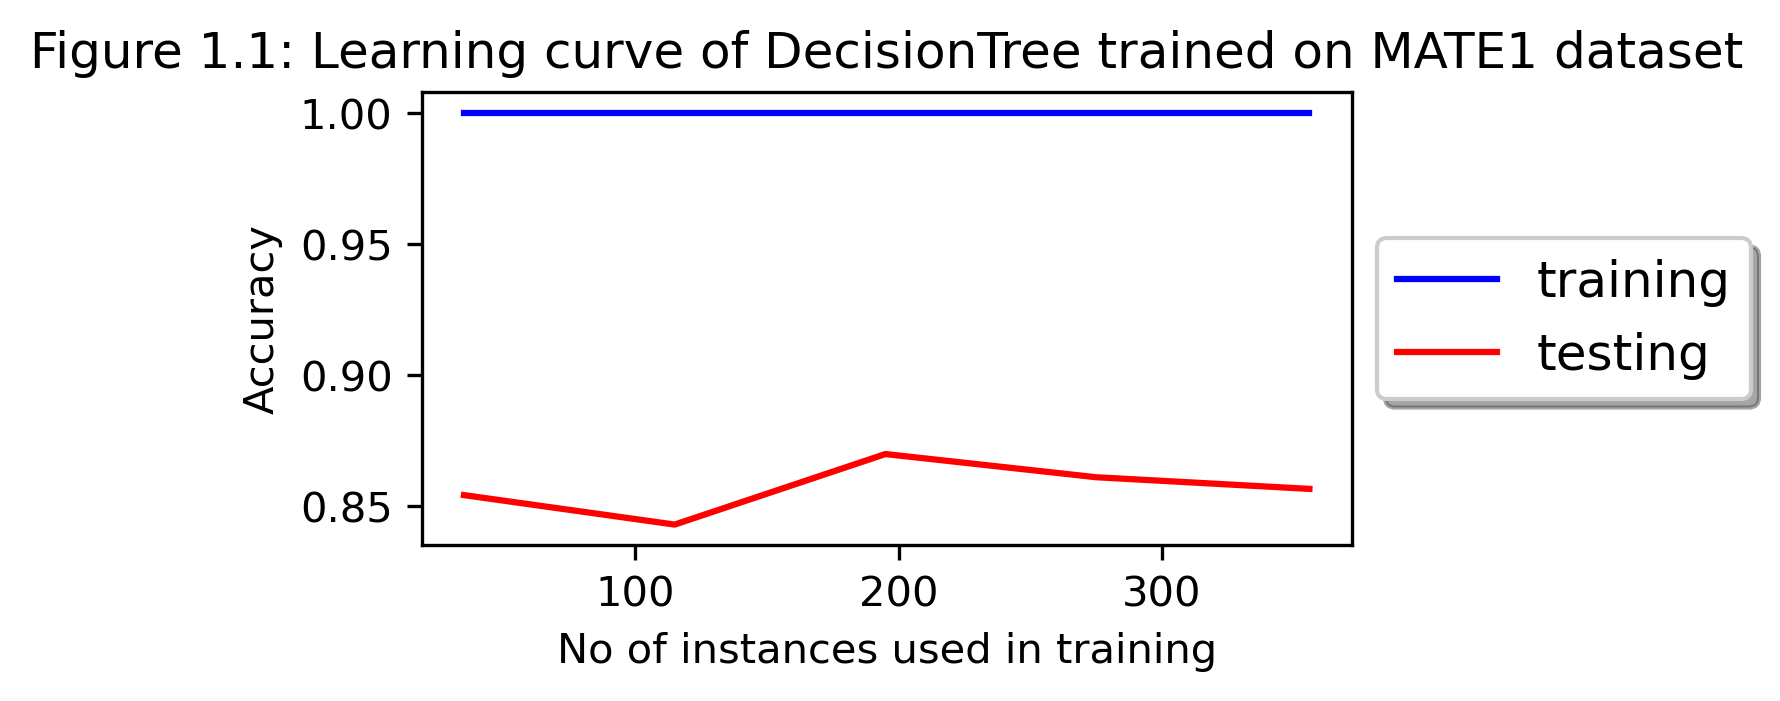

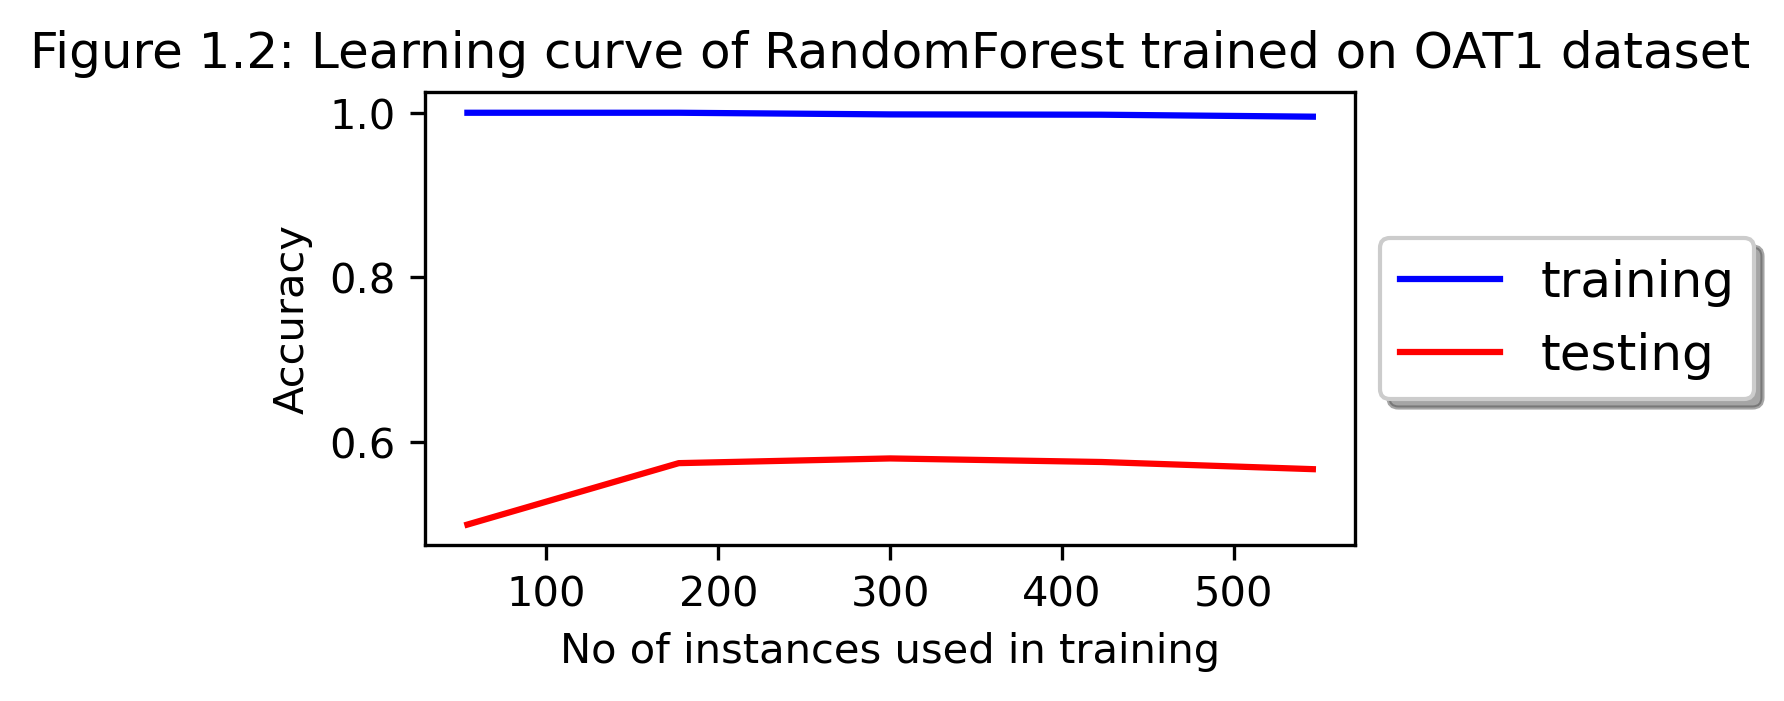

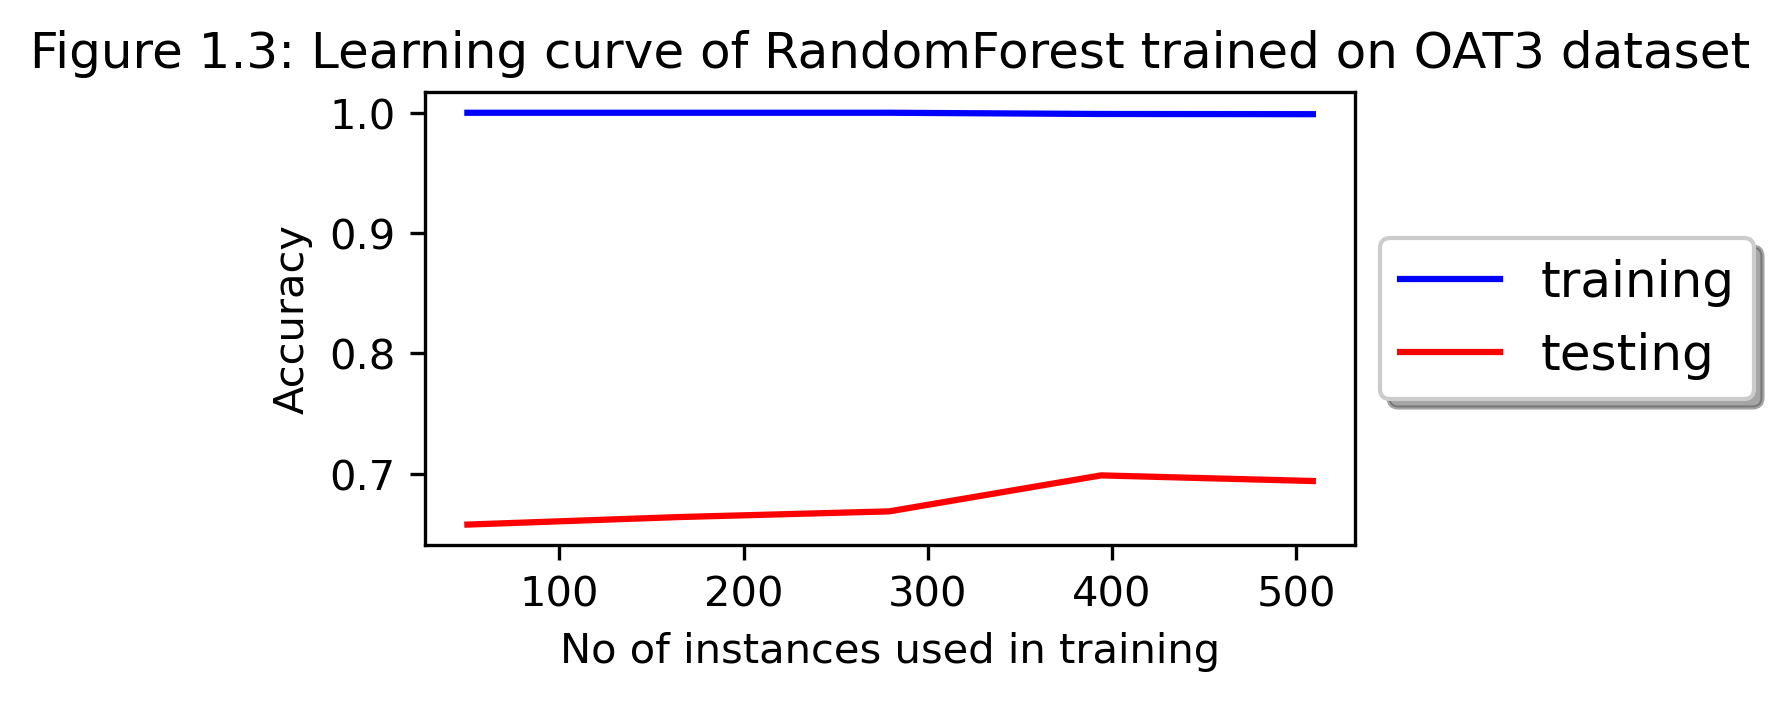

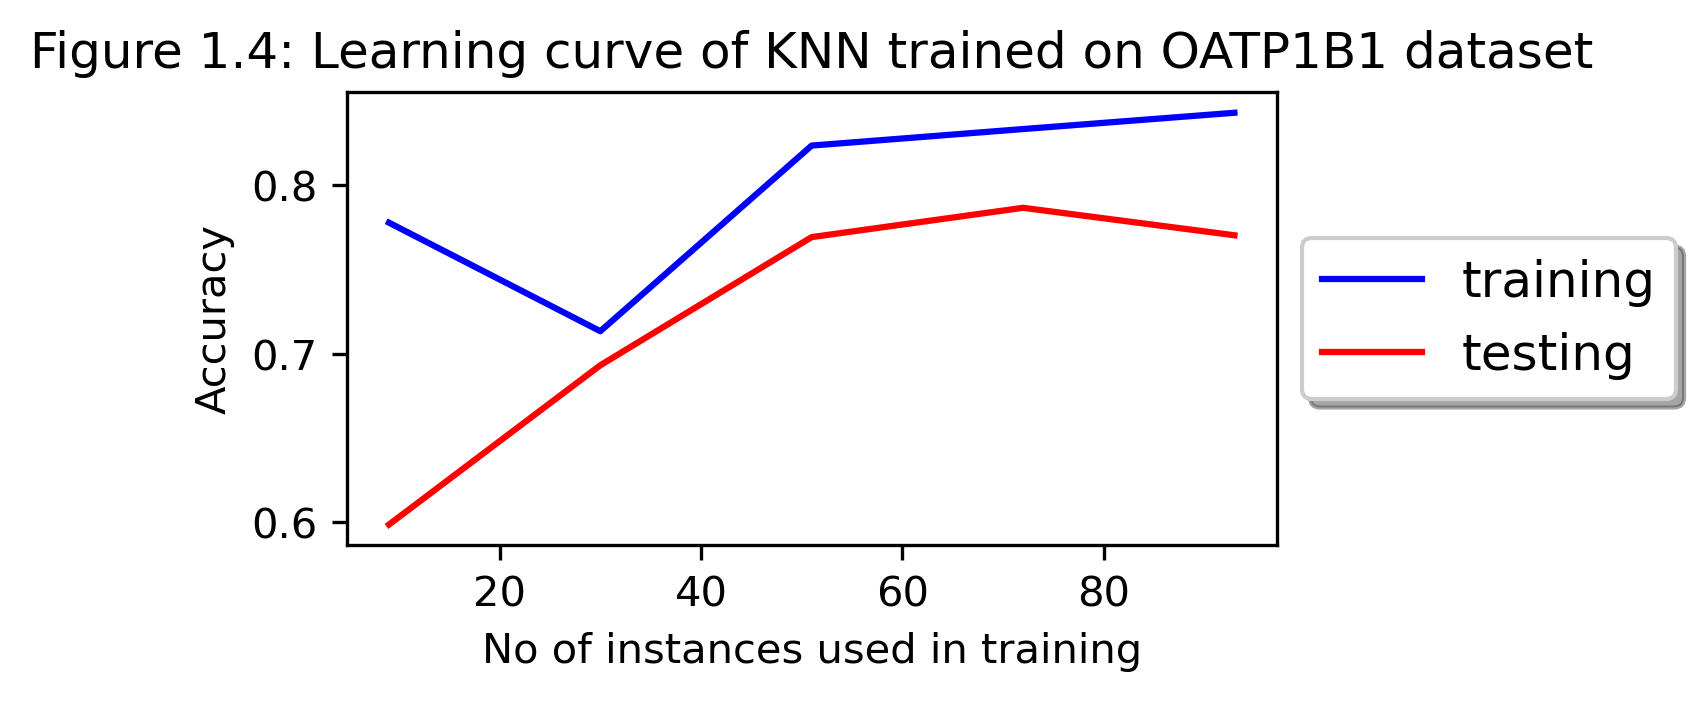

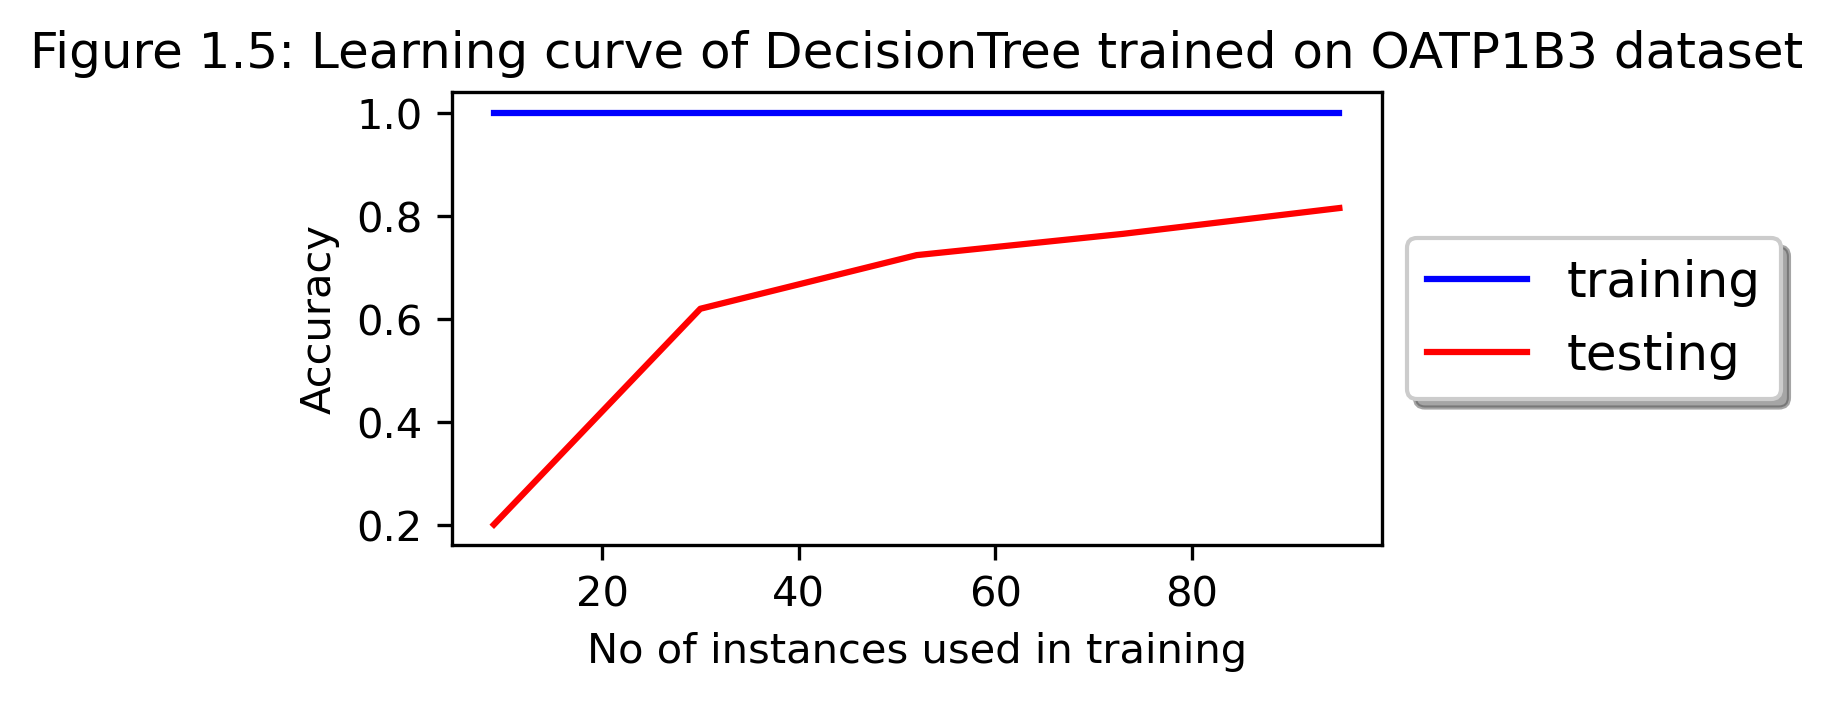

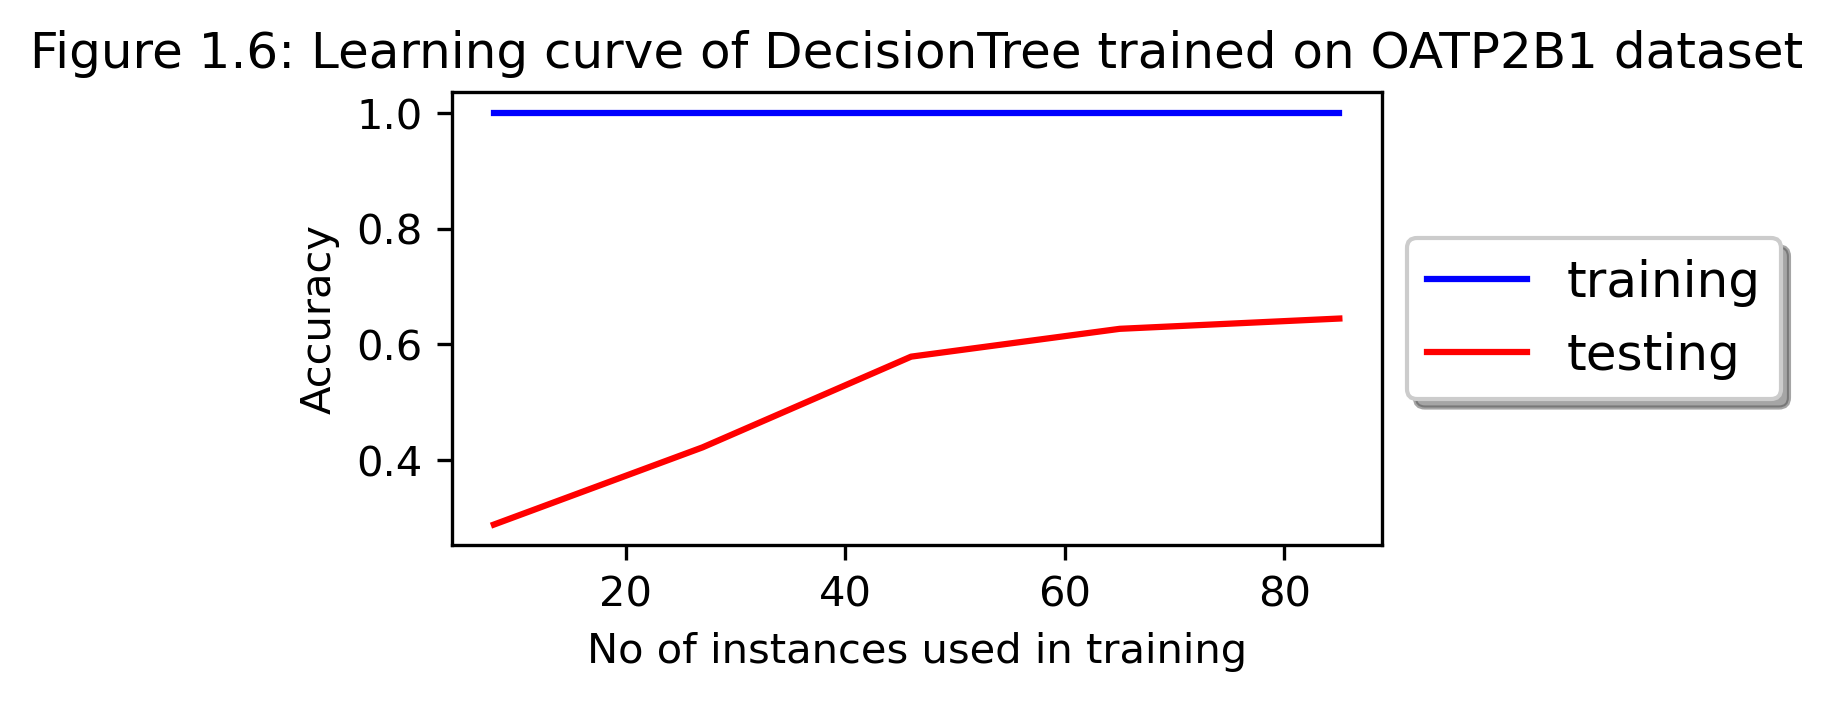

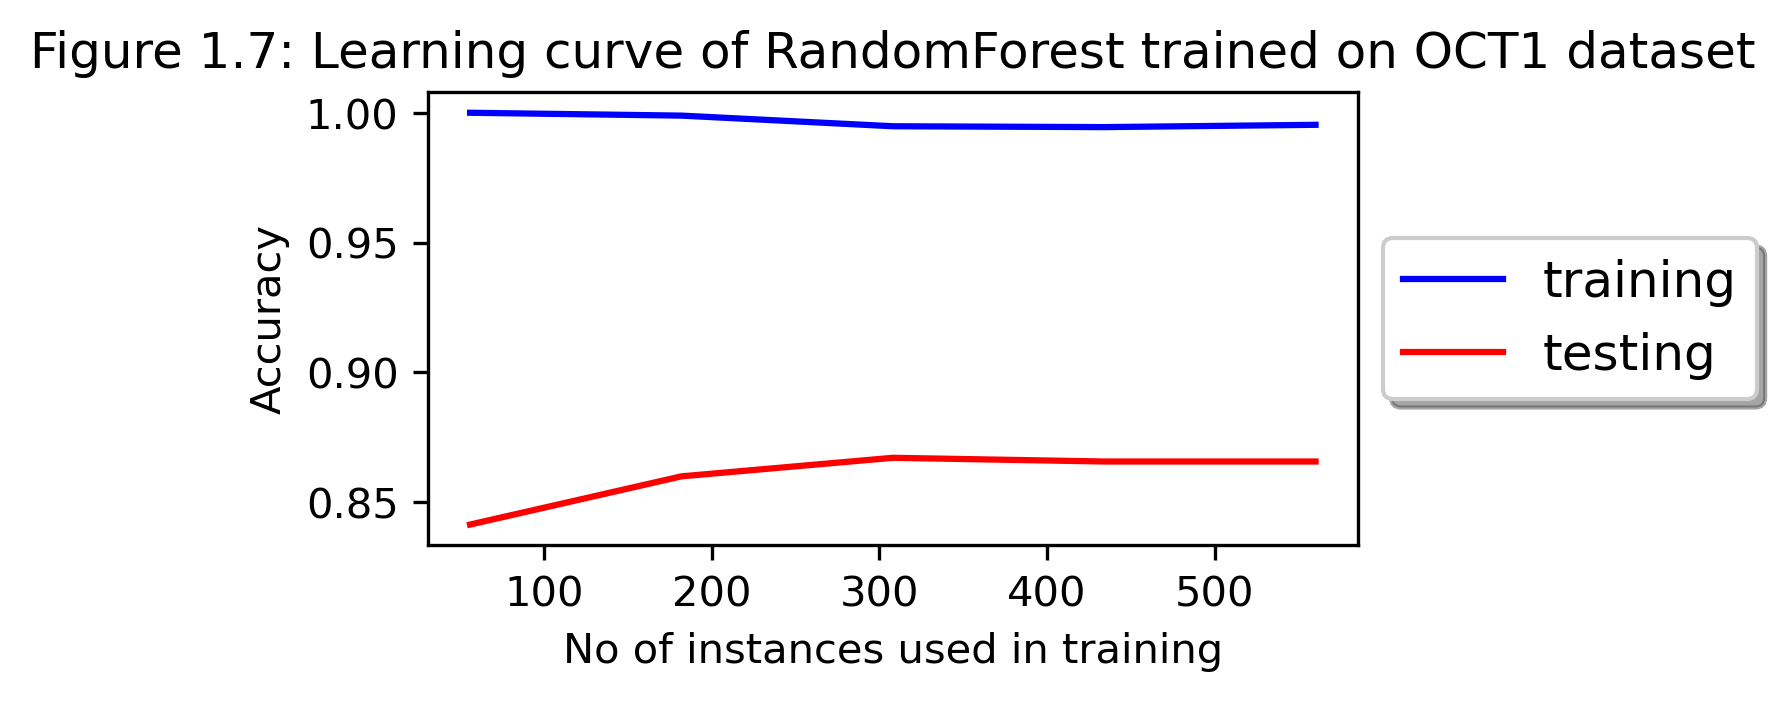

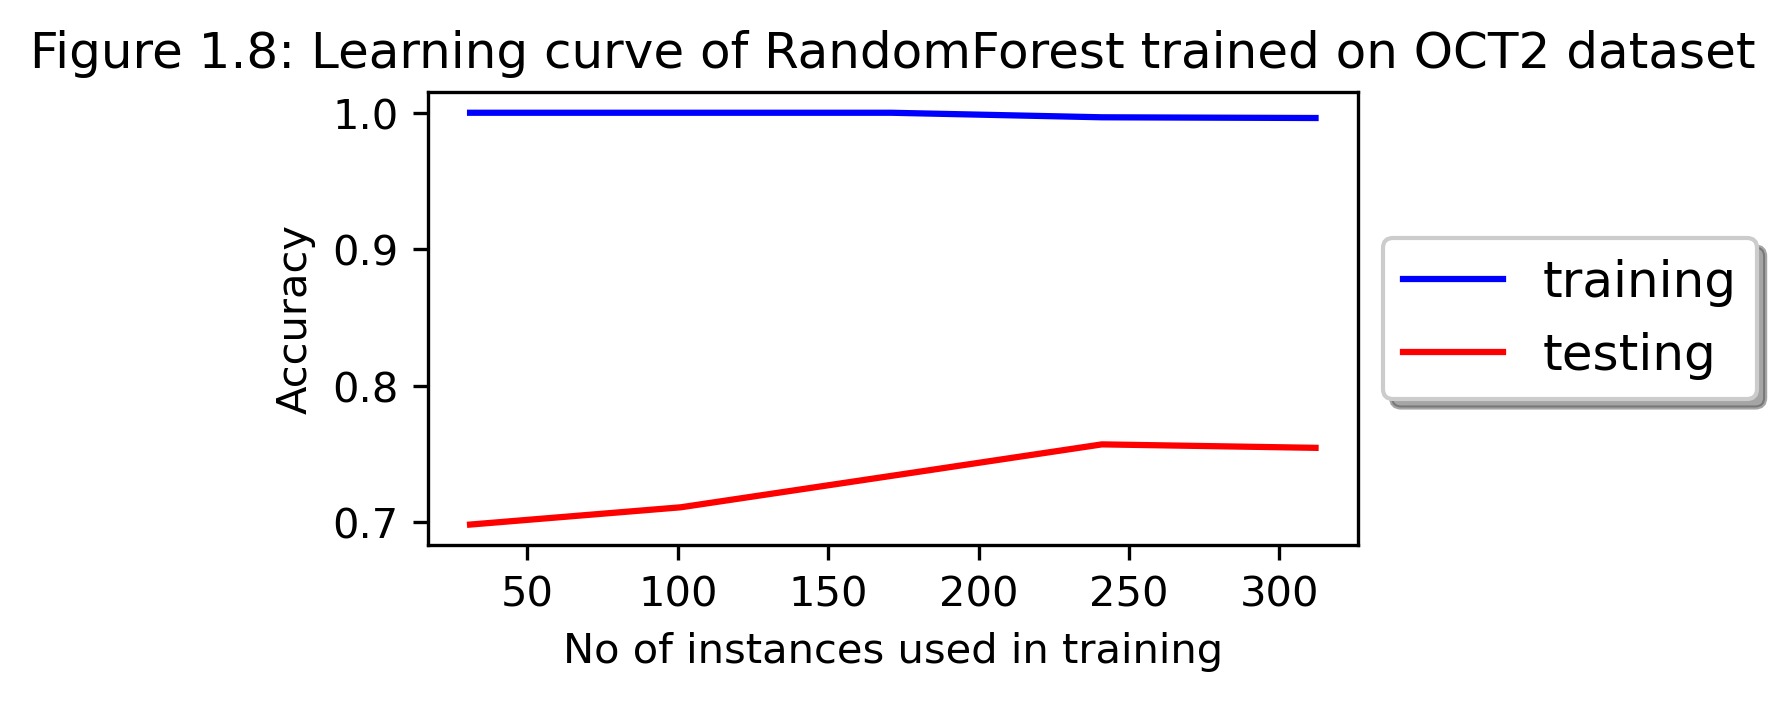

In [6]:
model_save_dir = '../output/models'
models = [('KNN', KNeighborsClassifier()),
          ('RandomForest', RandomForestClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
          ]
score_metrics = ['accuracy']
best_models_info=[]
count=1
for i in range(len(cleaned_dataset)):
    dataset_name = cleaned_dataset[i]['name']
    d = cleaned_dataset[i]['dataframe']
    x_train, y_train = get_data_for_model(d, target_col='Inhibition')
    
    # Scaling the features
    scaled_data = scaling_data(x_train, scaling_technique='standard')
    
    # Selecting top 20 features with high variance
    _, pca_x_train = pca_transform_data(scaled_data, n_comp=20)
    
    info = model_training_workflow(pca_x_train,
                            y_train,
                            models=models,
                            scoring=score_metrics,
                            k=5,
                            model_save_dir=model_save_dir,
                            dataset_name=dataset_name
                           )
    best_models_info.append(info)
    estimator = load_model(info['saved_model_path'])
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, pca_x_train, y_train, scoring='accuracy', cv=5, return_times=True)
    
    fig = plt.figure(figsize=(4, 2), dpi=300)
    plt.plot(train_sizes,np.mean(train_scores,axis=1), color="blue", label="training")
    plt.plot(train_sizes,np.mean(test_scores,axis=1), color="red", label="testing")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, fancybox=True, shadow=True, ncol=1)
    plt.xlabel("No of instances used in training")
    plt.ylabel("Accuracy")
    plt.title("Figure 1.{}: Learning curve of {} trained on {} dataset".format(count, info['model_name'],info['datasets_name']))
    plt.show()
    count+=1 
    
info_file_name = '../output/workflow_model_training_info.pkl'
with open(info_file_name, 'wb') as f:
    pickle.dump(best_models_info, f)

### 2.2 Analyzing the learning curve of the best trained model:
K-nearest neighbor (KNN), decision tree (DT) and random forest (RF) algorithm were used to train the classifiers on the 8 training datasets with their default parameter settings. However, only the random forest models were retained as the best models in all the training datasets. Figure 1.1-1.8 shows the learning curve of the 8 best random forest models. 

In [7]:
all_model_path = '../output/models'
test_result_savedir = '../output/'
info_file_name = '../output/workflow_model_training_info.pkl'
with open(info_file_name, 'rb') as f:
    best_models_info = pickle.load(f)
perform_model_evaluation(best_models_info, cleaned_dataset,test_result_savedir, fig_no = 2)

### 2.3 Evaluating generalization capability of the best models:
There are 8 best-trained models that were trained using each of the 8 public datasets. Therefore, each of the trained models is tested against the 7 unseen dataset that was not used during training to analyze the generalization capability of the models. The result has been presented in Figure 2.

# 3. Performing perdiction on instances from Human Metabolome Database (HMDB) 

### 3.1 Parsing from "data_hmdb.txt" to "data_hmdb.csv" 

In [8]:
filename = '../data/data_hmdb.txt'
save_file_name = '../output/data_hmdb.csv'
df_data = parse_text_file(filename, 
                       merge_col_name=True, 
                       col_name_pos=[[2,3]],
                       merge_data_col= True,
                       merge_data_to_col_pos=2,
                       )
df_data.to_csv(save_file_name)
# hmdb_dataset = pd.read_csv(save_file_name, index_col=[0])
# hmdb_dataset.shape
# hmdb_dataset.head(5)

### 3.2 Performing prediction on "data_hmdb.csv" and saving the result in "HMDB_prediction_result.csv" file in output folder

In [9]:
!python workflow.py --predict_hmdb True

# 4. New validation protocol: Stratified ShuffleSplit 10-fold cross validation and hyperparameter tuning

### 4.1 Re-evaluating best ML models with hyperparameter tuning and saving the models inside "/output/wrapper_output/models"

In [10]:
## Parameters of the best models has been provided in the /output/wrapper_output/models folder
## Please uncomment the following command if you want to re-train the models

#!python wrapper.py --train True --tune True

Fitting 10 folds for each of 1470 candidates, totalling 14700 fits
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
# Dataset: MATE1 ,	#Best model: RandomForest ,	#Accuracy: 0.9122222222222224
Fitting 10 folds for each of 1470 candidates, totalling 14700 fits
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
# Dataset: OAT1 ,	#Best model: KNN ,	#Accuracy: 0.6087591240875911
Fitting 10 folds for each of 1470 candidates, totalling 14700 fits
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
# Dataset: OAT3 ,	#Best model: RandomForest ,	#Accuracy: 0.72109375
Fitting 10 folds for each of 1470 candidates, totalling 14700 fits
Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


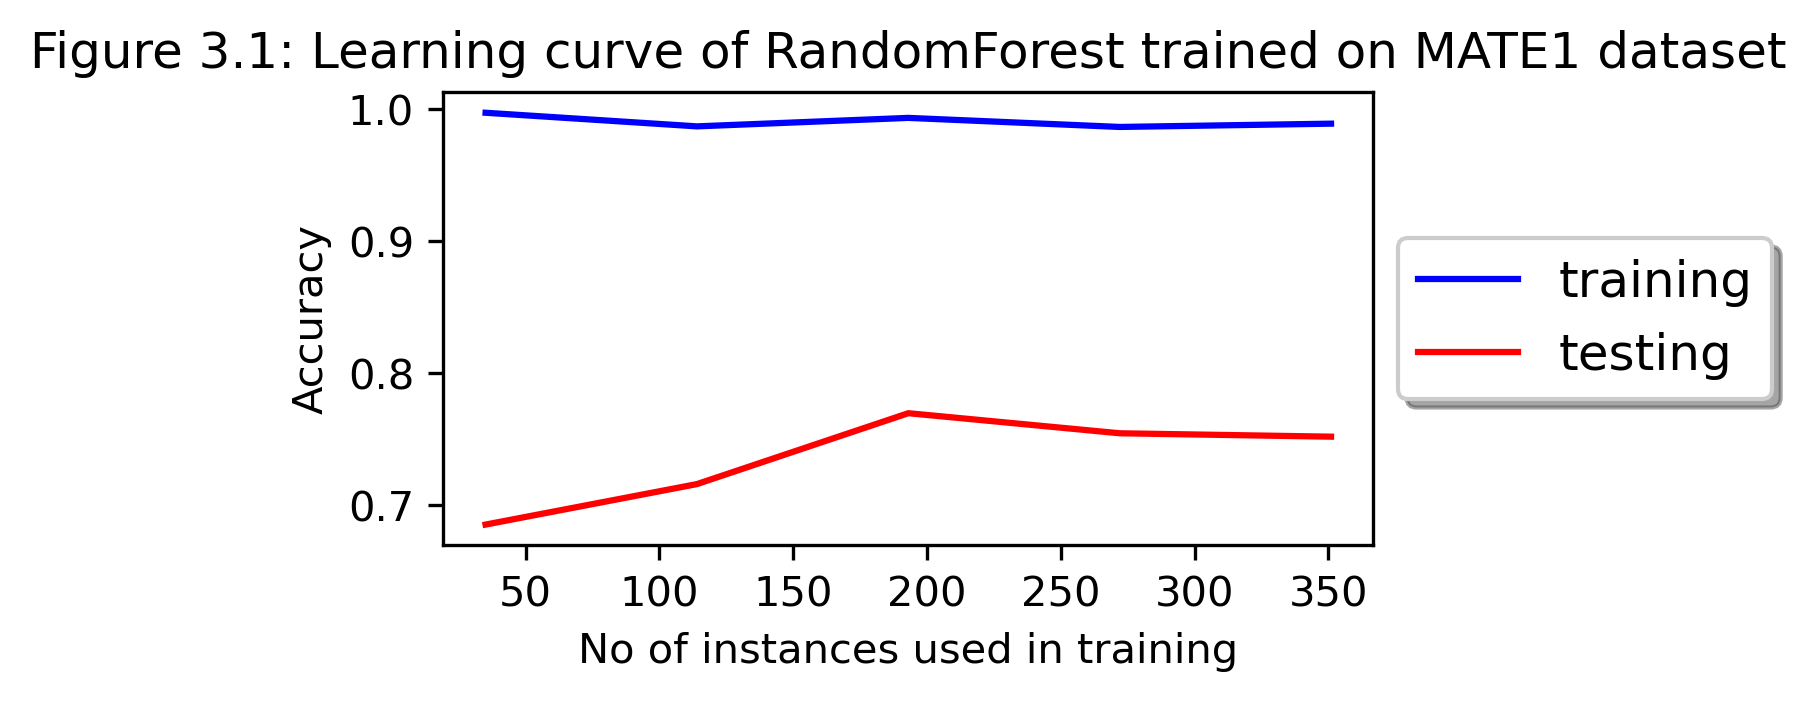

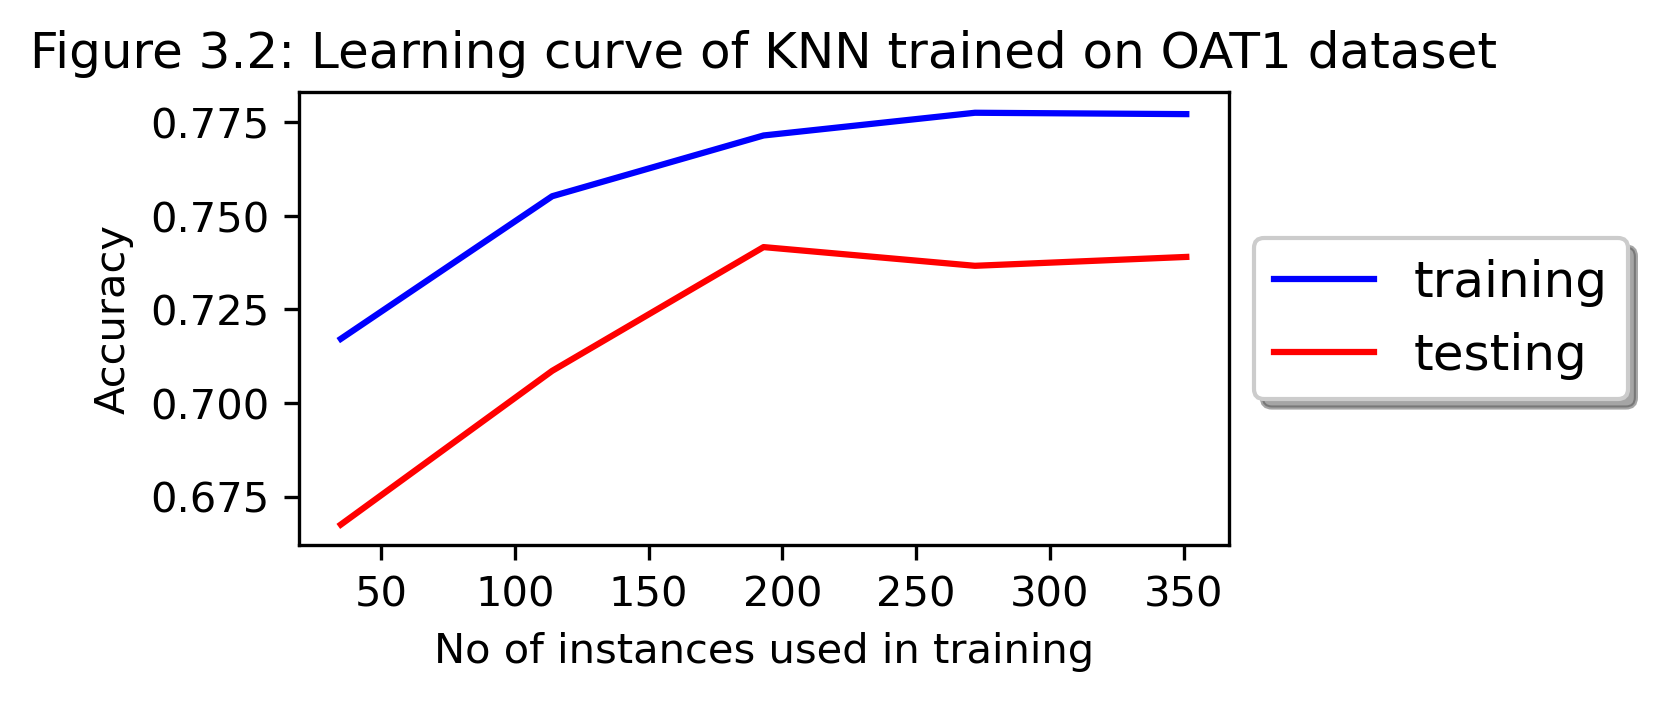

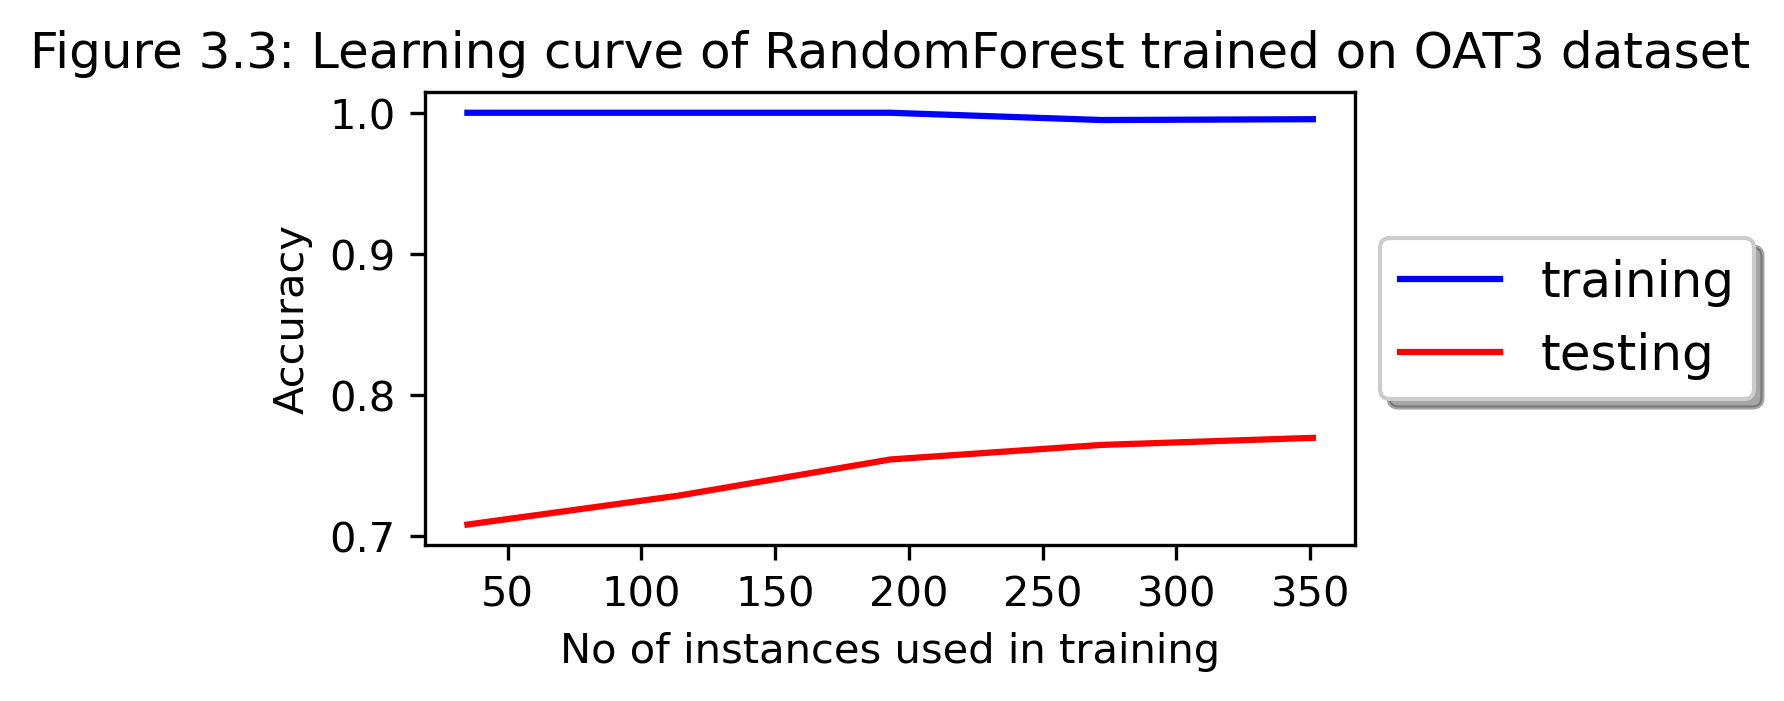

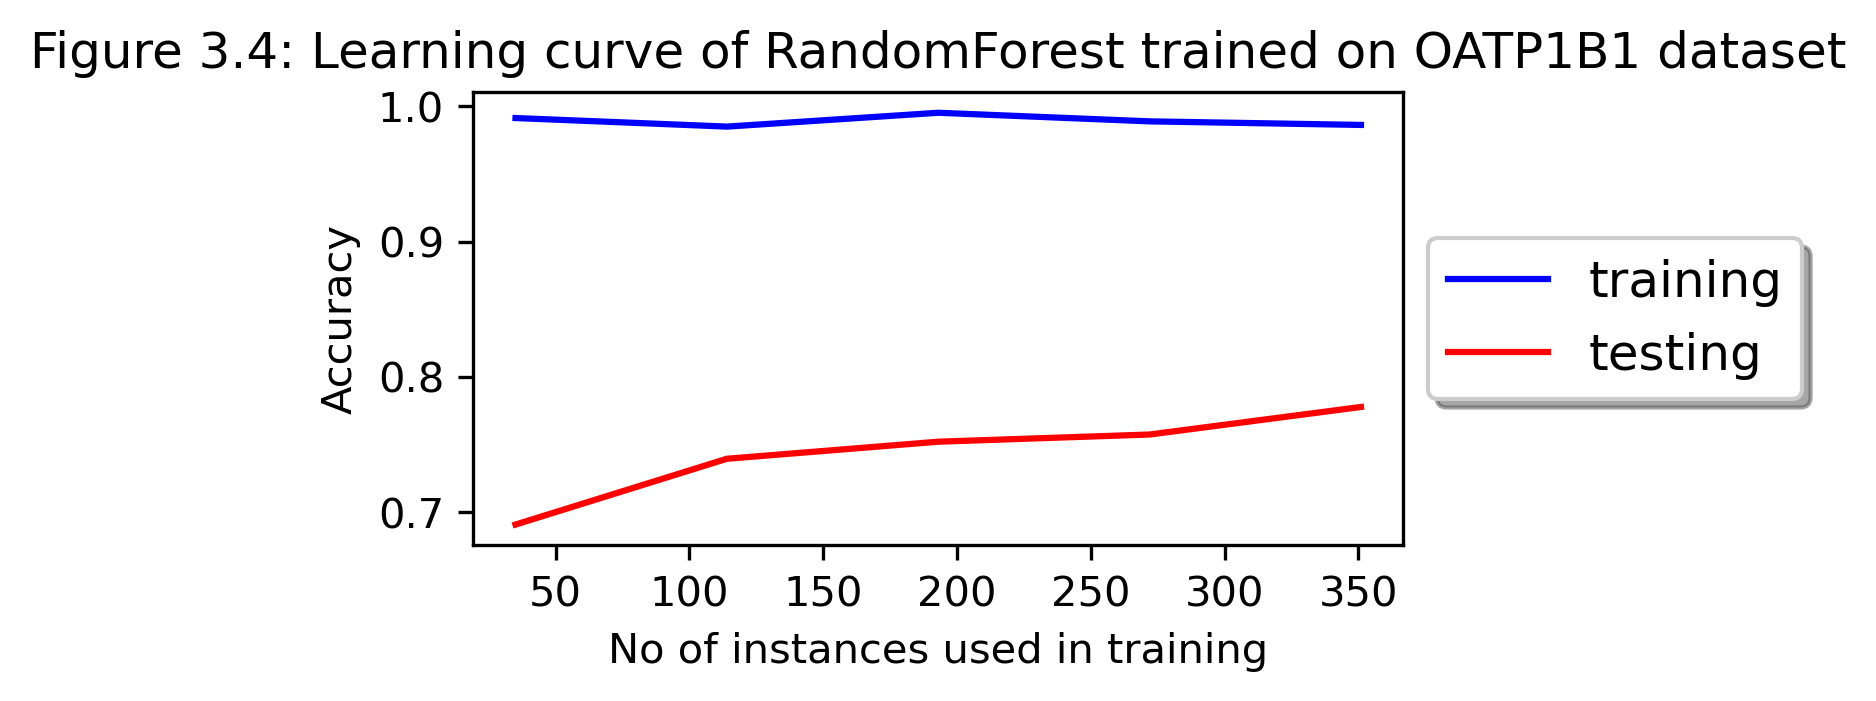

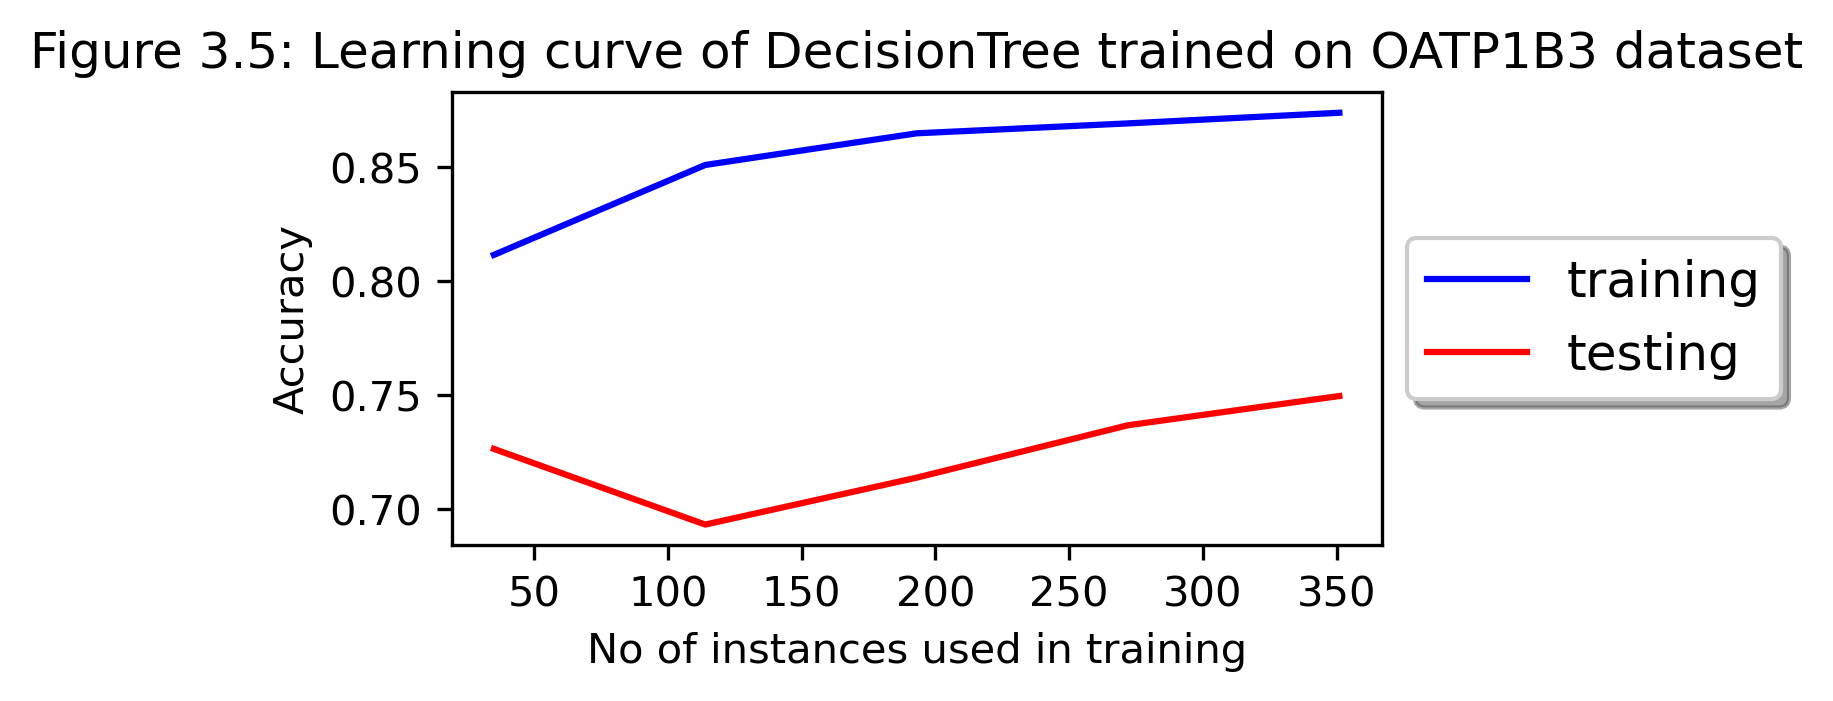

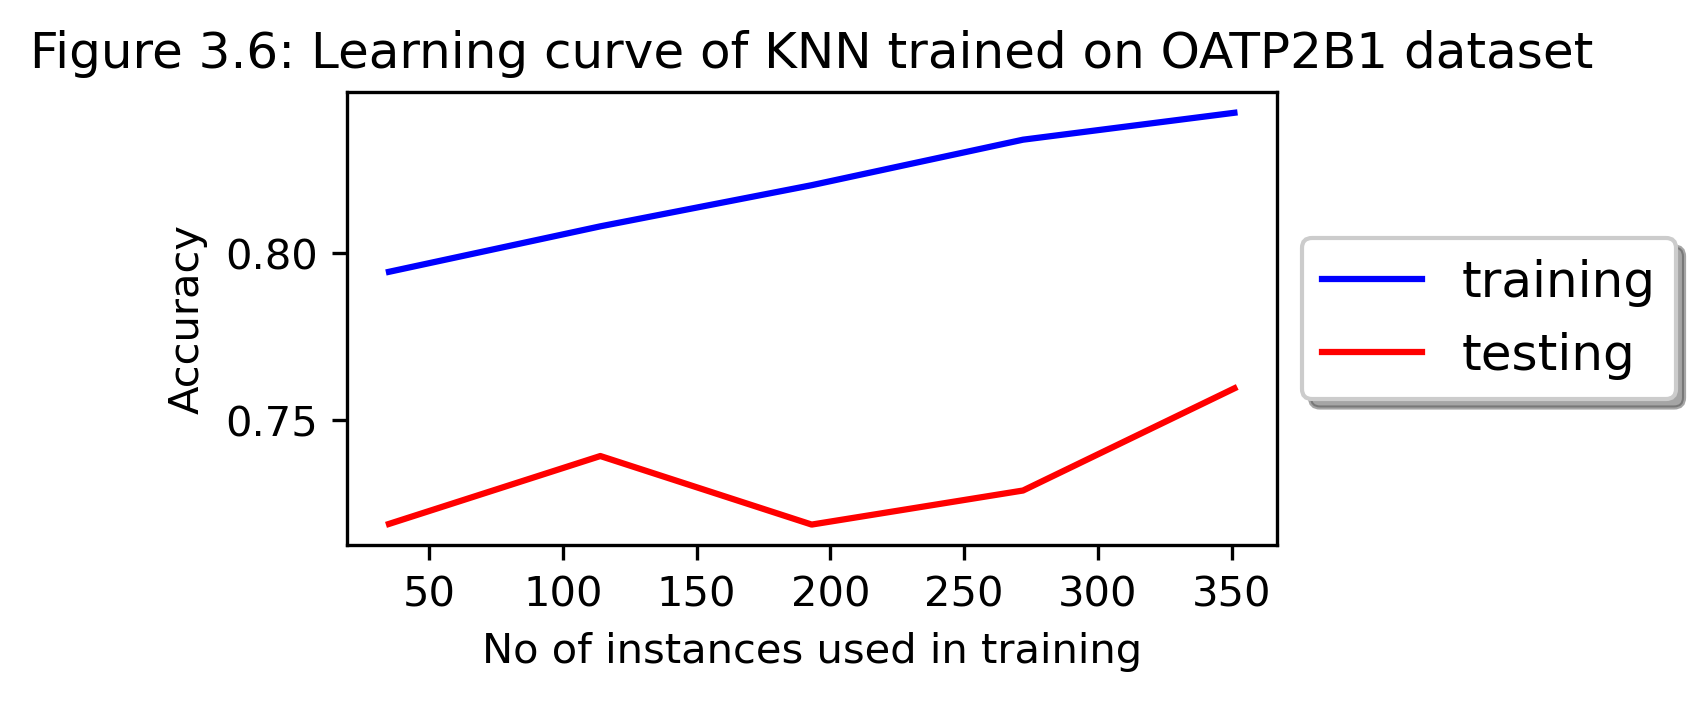

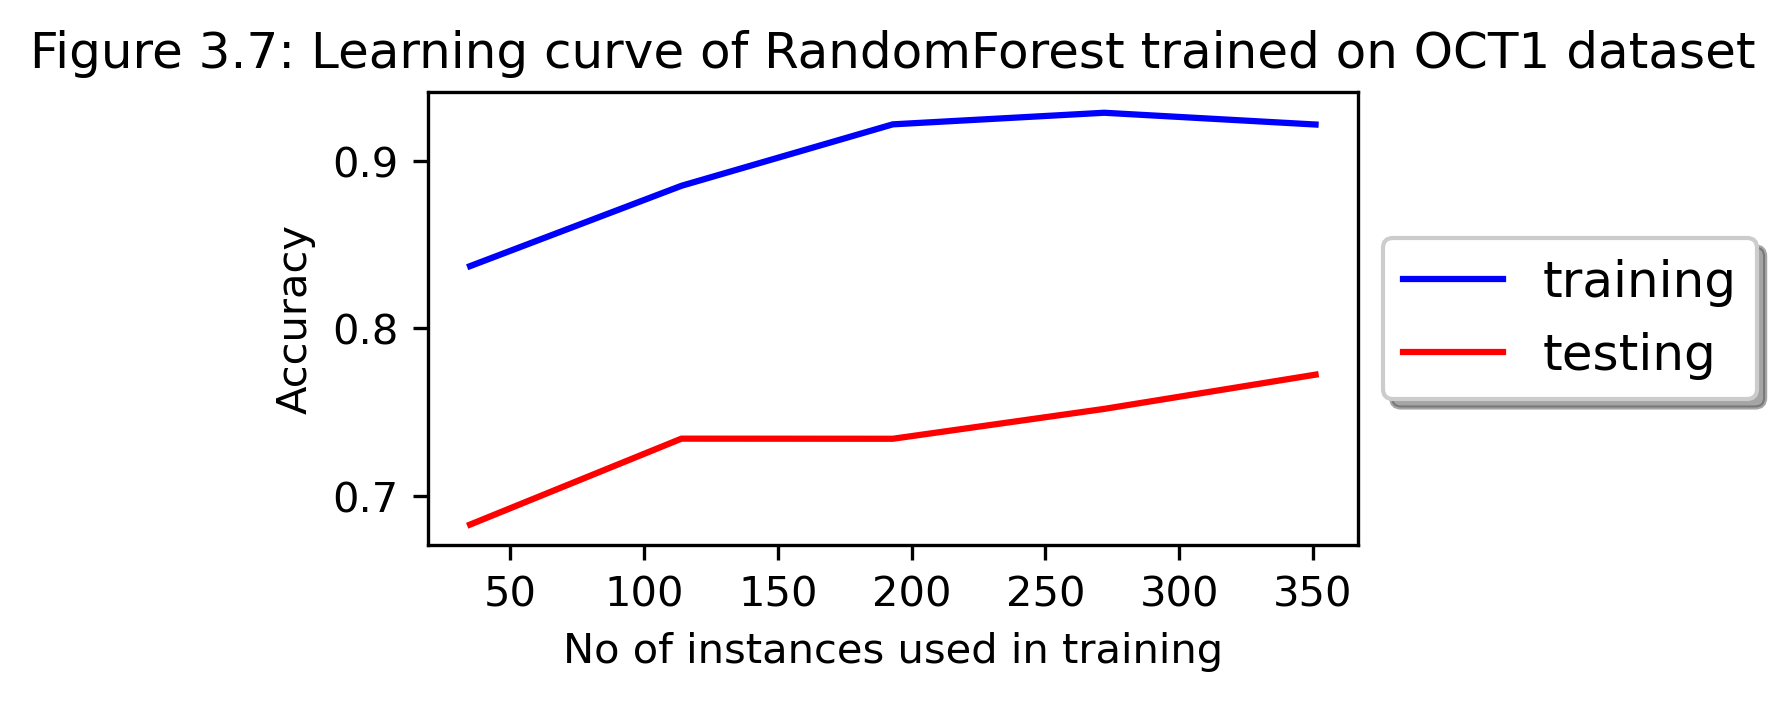

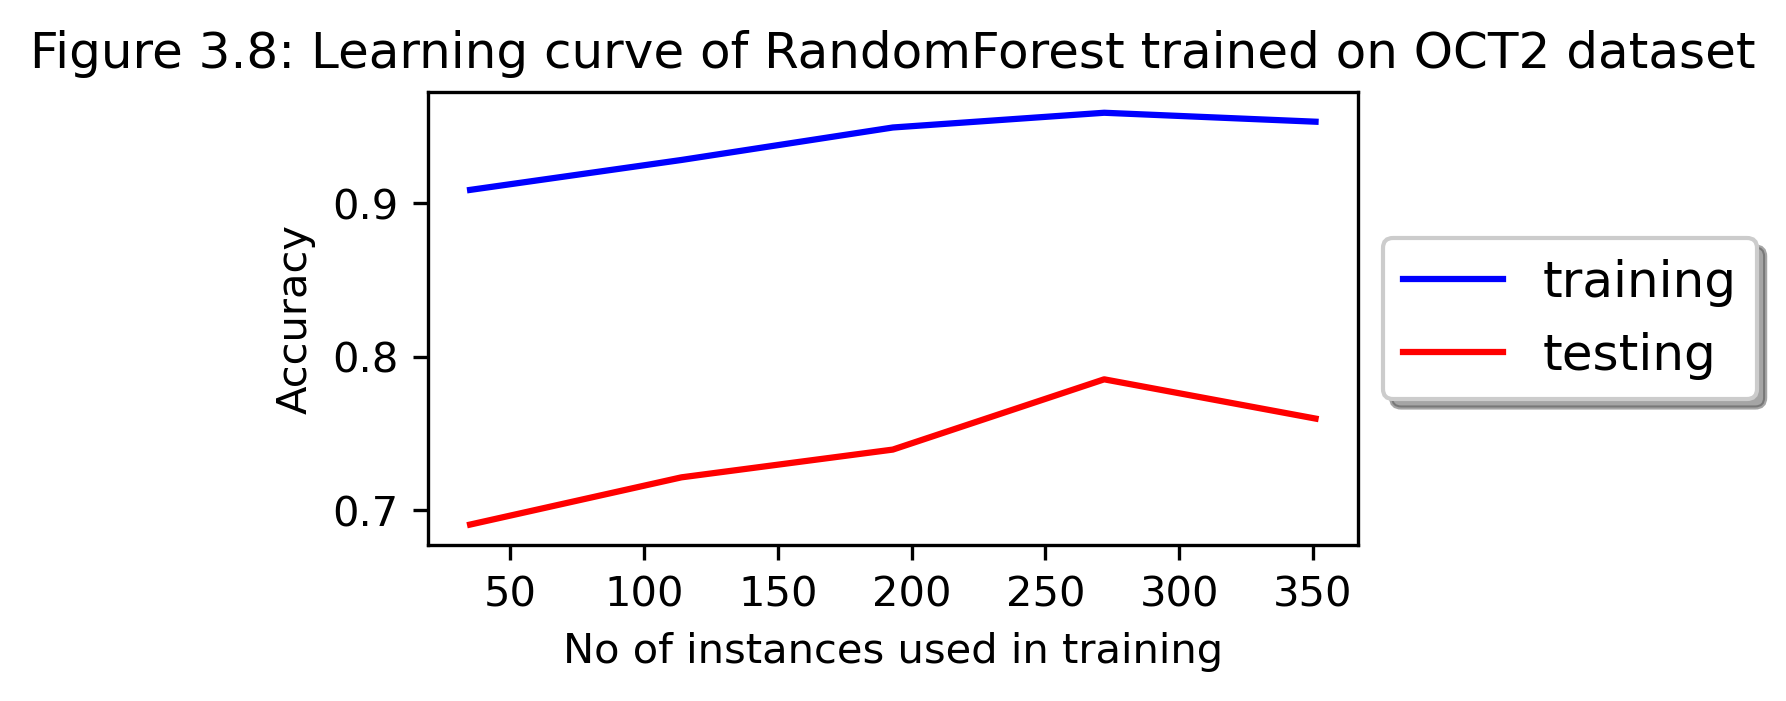

In [15]:
re_trained_info_file_name = '../output/wrapper_output/wrapper_model_training_info.pkl'
with open(re_trained_info_file_name, 'rb') as f:
    best_models_info = pickle.load(f)
    
count=1
for info in best_models_info:
    estimator = load_model(info['saved_model_path'])
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, pca_x_train, y_train, scoring='accuracy', cv=10, return_times=True)
    
    fig = plt.figure(figsize=(4, 2), dpi=300)
    plt.plot(train_sizes,np.mean(train_scores,axis=1), color="blue", label="training")
    plt.plot(train_sizes,np.mean(test_scores,axis=1), color="red", label="testing")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, fancybox=True, shadow=True, ncol=1)
    plt.xlabel("No of instances used in training")
    plt.ylabel("Accuracy")
    plt.title("Figure 3.{}: Learning curve of {} trained on {} dataset".format(count, info['model_name'],info['datasets_name']))
    plt.show()
    count+=1 

### 4.2 Analyzing learning curve of re-evaluated models:
In the earlier training approach with default parameter settings, we got the random forest classifier as the best model for all the training dataset (Figure 1.1-1.8). However, with the new training approach, we can see KNN and decision tree classifier selected as the best models as well. Besides the learning curve presented in Figure 3.1-3.8 clearly indicates the generalization capability of the best selected models. Next, we will analyze the performance of the newly trained best models on each of the 7 unknown datasets that were not used during training of these models. 

### 4.3 Testing re-evaluated best ML models againts unseen datasets and saving corresponding result in "/output/wrapper_output/output"

In [16]:
!python wrapper.py --test_model True 

Figure(18000x6000)


### 4.4 Analyzing generalization capability of the re-evaluated best models:
Similar to section 2.1 here, the generalization capability of the re-evaluated best models is analyzed against the 7 unknown datasets that were not used to train the model. Corresponding testing accuracy and dataset used to train the associated best model have been presented in Figure 4.

In [17]:
Image("../output/wrapper_output/output/performance_plot.png")

### 4.5 Performing prediction on "data_hmdb.csv" and saving result in "wrapper_HMDB_prediction_result.csv" file inside "/output/wrapper_output/output"

In [18]:
!python wrapper.py --predict_hmdb True